In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import matplotlib.figure as ff

# importar librerias de preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [3]:
tabla=pd.read_csv(r"C:\Users\Usuario\Documents\R Files\argentina (2).csv",delimiter=",")
t2=pd.DataFrame(tabla)
t2

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [4]:
q1=7.472753782258431
q2=9.142439505726308
q3=12.500143

q1,q2,q3

# Crea columna vacia
t2['poverty_index']=''

#establece condicionales para col. vacia
t2.loc[t2['poverty']<q1,'poverty_index'] ='Low'
t2.loc[(t2['poverty']>=q1)&(t2['poverty']<q2),'poverty_index'] ='Middle'
t2.loc[t2['poverty']>=q2,'poverty_index'] ='High'
t2


,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,poverty_index
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502,High
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495,High
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605,High
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679,Low
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440,High
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958,High
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415,Low


In [5]:
# ML1: Decision Tree
#==============================================
#1. Data preprocessing (OneHotEncoder)
#2. Splitting data for training and testing
#3. Preparing a classification model
#4. Assembling all of the steps using pipeline
#5. Training the model
#6. Running predictions on the model
#7. Evaluating and visualizing model performance
t2.dtypes

province                   object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
poverty_index              object
dtype: object

In [6]:
#1. Data preprocessing (SimpleImputer,OrdinalEncoder, Standard Scaler)

# Imputation of missing values NAN
# It is used to replace missing values (NAN) using a descriptive statistic (e.g. mean (var. num.), median (var.num.), "most frequent" se usa para un caracter repetido, "constant") along each column,
# or using a constant value.
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean') #np.nan
#t2[['illiteracy','no_healthcare']]=imp.fit_transform(t2[['illiteracy','no_healthcare']])


# OneHotEncoder (dummy encoding)
# Because ML algorithms perform better with numbers than with strings, we need to identify columns that have categories and convert them into numbers.
# We use the ** OneHotEncoder ** or  class provided by Sklearn. The idea  is to create binary variables that each represent a category.

#from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder()
#t2[['poverty_index']]=enc.fit_transform(t2[['poverty_index']])
#enc.categories_

### VISUALIZAR categorias en valores ###

# Standard Scaler #
# StandardScaler is applied to each of the columns, where each value is subtracted with the mean of its column and divided by its standard deviation.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
t2[['school_dropout','birth_mortal','poverty']]=scaler.fit_transform(t2[['school_dropout','birth_mortal','poverty']])
t2

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,poverty_index
0,Buenos Aires,2.926899e+08,1.383240,-0.476036,5.511856,-0.851463,48.7947,-0.171556,15625084,0.000006,0.004836,Middle
1,Catamarca,6.150949e+06,2.344140,-0.187273,10.464484,-0.686450,45.0456,-1.020029,367828,0.000005,0.004502,High
2,Córdoba,6.936374e+07,2.714140,-1.230354,10.436086,-0.612652,45.7640,-0.054526,3308876,0.000011,0.010175,Low
3,Corrientes,7.968013e+06,5.602420,0.764107,17.438858,1.900098,62.1103,0.267309,992595,0.000004,0.004495,High
4,Chaco,9.832643e+06,7.517580,1.607794,31.479527,0.757229,65.5104,0.735432,1055259,0.000003,0.003605,High
5,Chubut,1.774785e+07,1.548060,-0.507462,8.044618,-1.011204,39.5473,-0.581164,509108,0.000016,0.004498,Middle
6,Entre Ríos,2.074341e+07,3.185580,-0.714090,18.794568,0.144166,48.6571,-0.551906,1235994,0.000006,0.004679,Low
7,Formosa,3.807057e+06,4.610640,1.925444,28.004985,0.483247,65.8126,3.280849,530162,0.000004,0.003440,High
8,Jujuy,6.484938e+06,2.151390,0.932218,12.483179,-0.891317,54.1615,-0.376360,673307,0.000003,0.003958,High
9,La Pampa,6.990262e+06,1.539300,-1.767533,16.505714,-1.350667,45.4764,0.647658,318951,0.000019,0.005415,Low


In [7]:
# High=0, Middle=1,Low=2
# Ver como codificar codigo

In [8]:
#2. Splitting data for training and testing
from sklearn.model_selection import train_test_split
x=pd.DataFrame(t2,columns=['poverty','illiteracy','birth_mortal'])      # dataset.data
y=pd.DataFrame(t2,columns=['poverty_index']) # dataset.target 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)


In [9]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)


x_train shape: (17, 3)
y_train shape: (17, 1)
x_test shape: (5, 3)
y_test shape: (5, 1)


In [10]:
#3. Preparing a RFC  model
 #classifier=RandomForestClassifier()
RFC=RandomForestClassifier(n_estimators=70)

#4. training the model.
RFC=RFC.fit(x_train,y_train)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17880\3650565950.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC=RFC.fit(x_train,y_train)


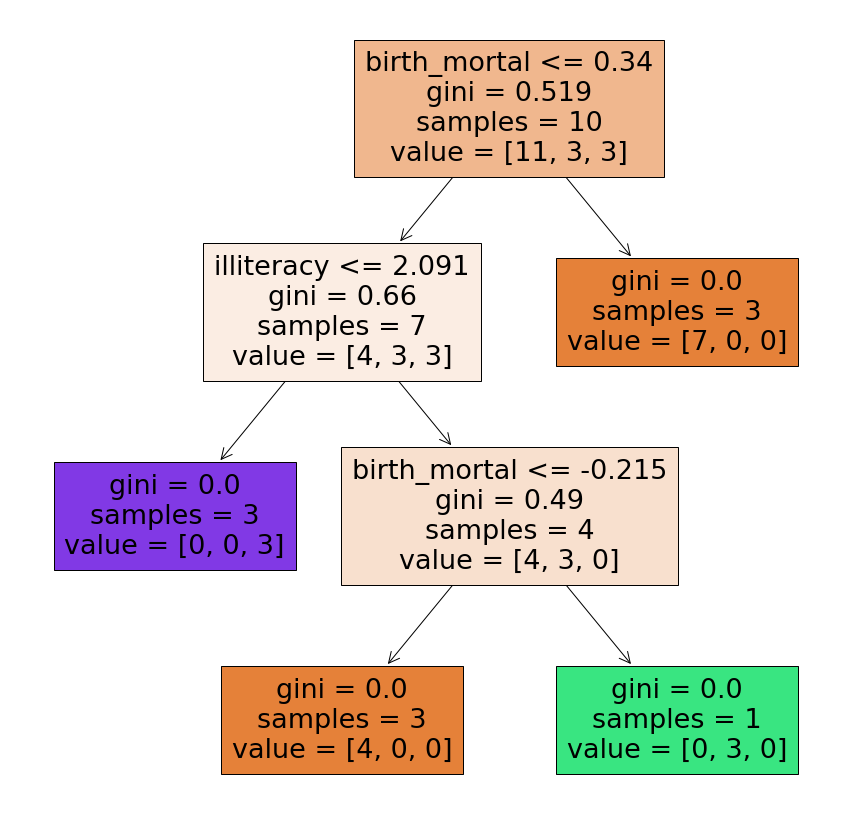

In [11]:
# visualizamos arbol de clasificacion
# It does not require standarization and it is not affected by outliers.
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
# and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

plt.figure(figsize=(15,15))
t=plot_tree(RFC.estimators_[0], feature_names=x_train.columns, filled=True)

In [12]:
y_train.value_counts()

poverty_index
High             9
Low              5
Middle           3
dtype: int64

In [13]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
RFC.n_estimators

70

In [15]:
RFC.criterion

'gini'

In [16]:

#5. Running predictions on the model
y_pred_model=RFC.predict(x_test)
y_pred_model

#H:0,m:1,L:2
# M HHH L
#Ajustamos los datos al modelo
# y_pred_model=y_pred_model.fit(x_test,y_test)

array(['Middle', 'High', 'High', 'Middle', 'Middle'], dtype=object)

In [17]:
y_test=np.array(y_test,dtype='object')
y_test

array([['Low'],
       ['Middle'],
       ['High'],
       ['High'],
       ['Middle']], dtype=object)

In [18]:

df_prediccion=pd.DataFrame(y_test,y_pred_model)
df_prediccion

,0
Middle,Low
High,Middle
High,High
Middle,High
Middle,Middle


[[1 0 1]
 [0 0 1]
 [1 0 1]]


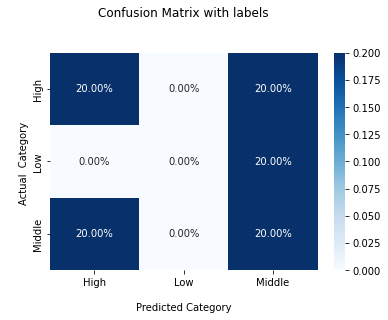

In [19]:
#6. Evaluating and visualizing model performance

# Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred_model)
print(cf_matrix)

# Plot confusion matrix
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category');
ax.set_ylabel('\nActual  Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['High','Low','Middle'])
ax.yaxis.set_ticklabels(['High','Low','Middle'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
# metric 1. precission score
from sklearn.metrics import precision_score
ps=precision_score(y_test,y_pred_model,average='macro')
round(ps*100,2)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


27.78

In [21]:
# metric 2. recall score
from sklearn.metrics import recall_score
rs=recall_score(y_test,y_pred_model,average='macro')
round(rs*100,2)

33.33

In [22]:
# metric 3. accuracy
from sklearn.metrics import accuracy_score
accs=accuracy_score(y_test,y_pred_model)
round(accs*100,2)

40.0

In [23]:
print("metric_1 (Precission_Score) :",round(ps*100,2))
print("metric_2 (Recall Score):",round(rs*100,2))
print("metric_3 (Accuracy):",round(accs*100,2))

metric_1 (Precission_Score) : 27.78
metric_2 (Recall Score): 33.33
metric_3 (Accuracy): 40.0


In [24]:
                            ############################################## CLUSTERING JERARQUICO  #############################
                            ###################################################################################################
#...Determinar cuantos clústers se podrían formar  para representar la mortalidad infantil y la pobreza y representarlos en un dendograma....."

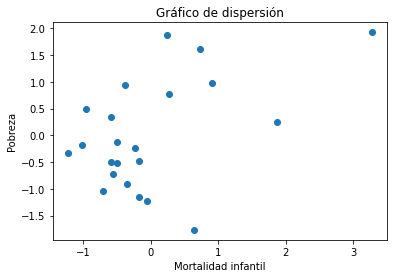

In [25]:
# Seleccionar las variables
xc=np.array(t2['birth_mortal'] ,dtype=float)    
yc=np.array(t2['poverty'] ,dtype=float)

# Graficar la recta de regresion del modelo predictivo
plt.scatter(xc,yc)
#plt.plot(x4,y4,'r')
plt.xlabel('Mortalidad infantil')
plt.ylabel('Pobreza')
plt.title('Gráfico de dispersión')
plt.show()

In [26]:
# Calculo de distancias euclideas entre los puntos
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Crear un dataframe con las variables a analizar
td=pd.DataFrame(xc,yc)
td

# Calcular el enlace jerárquico
clus = hierarchy.linkage(td, "single")
clus

# hierarchy.linkage: "single": distancia min, "complete": distancia max., "centroid"

array([[0.00000000e+00, 1.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.30000000e+01, 1.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 2.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [8.00000000e+00, 1.70000000e+01, 2.92576733e-02, 2.00000000e+00],
       [6.00000000e+00, 2.40000000e+01, 2.92576733e-02, 3.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 2.92576733e-02, 2.00000000e+00],
       [2.30000000e+01, 2.60000000e+01, 5.85153466e-02, 5.00000000e+00],
       [1.00000000e+00, 2.00000000e+01, 5.85153466e-02, 2.00000000e+00],
       [1.60000000e+01, 2.20000000e+01, 5.85153466e-02, 3.00000000e+00],
       [4.00000000e+00, 9.00000000e+00, 8.77730199e-02, 2.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 1.17030693e-01, 4.00000000e+00],
       [1.90000000e+01, 2.80000000e+01, 1.17030693e-01, 6.00000000e+00],
       [2.50000000e+01, 3.20000000e+01, 1.17030693e-01, 6.00000000e+00],
       [3.30000000e+01, 3.40000000e+01, 1.17030693e

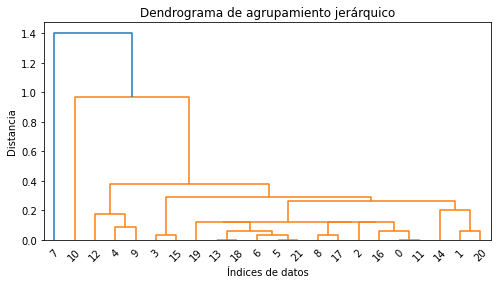

In [27]:

# Crear el dendrograma
plt.figure(figsize=(8, 4))
dendrogram = hierarchy.dendrogram(clus)

# Personalizar el gráfico (opcional)
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()


In [28]:
# Cambiar el indice de los datos por una variable categorica "provincia"
td.index=t2['province']
td.index
td.index

Index(['Buenos Aires', 'Catamarca', 'Córdoba', 'Corrientes', 'Chaco', 'Chubut',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza',
       'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán'],
      dtype='object', name='province')

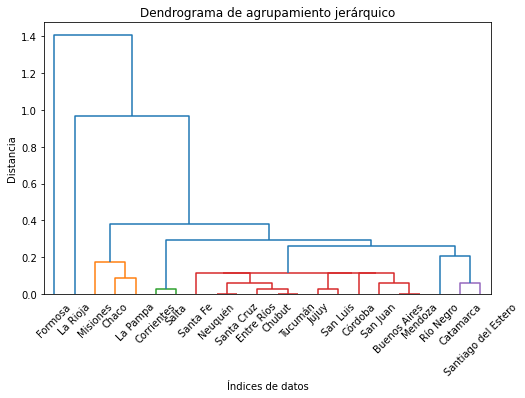

In [29]:

# Crear el dendrograma
plt.figure(figsize=(8, 5))
dendrogram = hierarchy.dendrogram(clus,labels=td.index,color_threshold=0.2)
                                  
# color_threshold ((double)) – Value at which the separation of clusters will be made

# Personalizar el gráfico (opcional)
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()


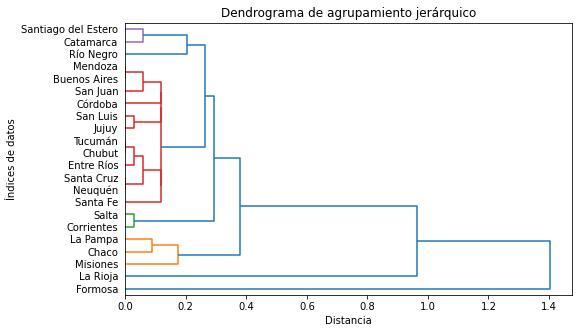

In [30]:

# Crear el dendrograma
plt.figure(figsize=(8, 5))
dendrogram = hierarchy.dendrogram(clus,labels=td.index,color_threshold=0.2, orientation='right')
                                  
# color_threshold ((double)) – Value at which the separation of clusters will be made
# orientation= 'left', 'right', 'top','bottom'

# Personalizar el gráfico (opcional)
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Distancia")
plt.ylabel("Índices de datos")
plt.show()


In [31]:
###################  ALGORITMO DE CLUSTERING NO JERARQUICO ##################################
########### METODO: KMEANS, KMEDOID 

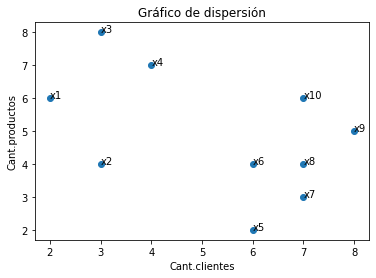

In [32]:

xcli=[2,3,3,4,6,6,7,7,8,7]
yprod=[6,4,8,7,2,4,3,4,5,6]
etiqueta=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

# Graficar la recta de regresion del modelo predictivo
plt.scatter(xcli,yprod)
#plt.plot(x4,y4,'r')
plt.xlabel('Cant.clientes')
plt.ylabel('Cant.productos')
plt.title('Gráfico de dispersión')
for i, label in enumerate(etiqueta):
    plt.text(xcli[i], yprod[i], label)
plt.show()


In [33]:
# Create KMeans algorithm

#km=KMeans(n_clusters = 3, random_state = None, n_init='auto', max_iter=300)

In [34]:
# Turn the data into a set of points
data=list(zip(xcli,yprod))
print(data)

[(2, 6), (3, 4), (3, 8), (4, 7), (6, 2), (6, 4), (7, 3), (7, 4), (8, 5), (7, 6)]


In [35]:
# Elbow method: to identify the best number of clusters we need to calculate the iertia of each cluster.
# Inertia: Sum of Squares Errors (SSE). It shows the sum of the distances of all points within a cluster from it centroid.

inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)



In [36]:
inertias

[71.0,
 23.583333333333336,
 15.5,
 8.25,
 5.75,
 3.3333333333333335,
 2.3333333333333335,
 1.3333333333333335,
 0.5,
 0.0]

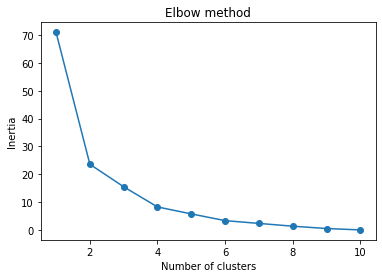

In [37]:
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [38]:
# Elbow mehtod" : The value at which the inertia becomes more linear is at k=2. The optimal number of clusters is 2.

In [39]:
# Turn the data into a set of points
data=list(zip(xcli,yprod))
print(data)

[(2, 6), (3, 4), (3, 8), (4, 7), (6, 2), (6, 4), (7, 3), (7, 4), (8, 5), (7, 6)]


In [40]:

# Create 2 Clusters
kmeans2=KMeans(n_clusters=2)
kmeans2.fit(data)

# Show centroid
kmeans2.cluster_centers_

# Create labels of any cluster : 0,1 
kmeans2.labels_

# Calculate inertia
kmeans2.inertia_


23.583333333333336

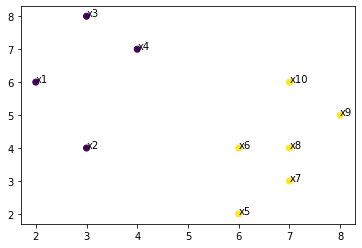

In [41]:
# Visualize the kmeans algorithm with k=2 
plt.scatter(xcli,yprod, c=kmeans2.labels_)

etiqueta=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
for i, label in enumerate(etiqueta):
    plt.text(xcli[i], yprod[i], label)
    
plt.show()

In [42]:
# Add a column to a data frame that show the cluster value
datakm=pd.DataFrame({'xcli':xcli,'yprod':yprod})
datakm['cluster']=kmeans2.labels_
datakm

,xcli,yprod,cluster
0,2,6,0
1,3,4,0
2,3,8,0
3,4,7,0
4,6,2,1
5,6,4,1
6,7,3,1
7,7,4,1
8,8,5,1
9,7,6,1


In [43]:
# Create 3 Clusters
kmeans3=KMeans(n_clusters=3)
kmeans3.fit(data)

# Show centroids
#kmeans3.cluster_centers_


# Create labels of any cluster : 0,1,2
kmeans3.labels_

# Calculate inertia
kmeans3.inertia_


15.5

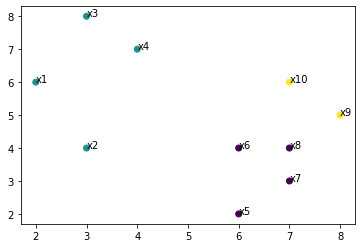

In [44]:
# Visualize the kmeans algorithm with k=3 
plt.scatter(xcli,yprod, c=kmeans3.labels_)

etiqueta=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
for i, label in enumerate(etiqueta):
    plt.text(xcli[i], yprod[i], label)
    
plt.show()

In [45]:
# Create 4 Clusters
kmeans4=KMeans(n_clusters=4)
kmeans4.fit(data)

# Show centroids
# kmeans4.cluster_centers_

# Create labels
kmeans4.labels_

# Calculate inertia
kmeans4.inertia_


8.25

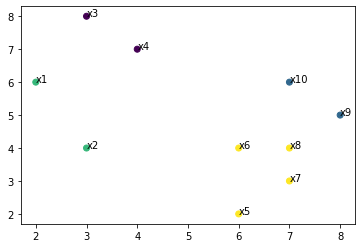

In [46]:
# Visualize the kmeans algorithm with k=3 
plt.scatter(xcli,yprod, c=kmeans4.labels_)

etiqueta=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
for i, label in enumerate(etiqueta):
    plt.text(xcli[i], yprod[i], label)
    
plt.show()

In [47]:
kmeans4.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [48]:
###### Hiperparámteros del algoritmo k-means #############
##########################################################

# algorithm: {“lloyd”, “elkan”}, default=”lloyd”. Tipo de algoritmo kmeans depediendo el set de datos.
# 'copy_x': True. El valor original de las distnacias entre los puntos no es modificado. 
# n_cluster: Nro. de clusters preestablecidos por el usuario.
# 'init': 'k-means++': ‘k-means++’ : Selecciona los valores iniciales de los centroides usando distribucion de probabilidad empírica.
# random_state=None: Detemina  nros. aleatorios para hallar el valor del centroide de inicialización.
# n_init='auto': Cantidad de veces que el algoritmo se ejecuta con diferentes centroides.
# max_iter: Limita la cantidad de iteraciones. Por default el max. nro. de iteraciones es 300
# tol: Rango de tolerancia de la diferencia del centroide entre 2 clusters consecutivos. 
# verbose: Detremina la velocidad del proceso de agrupamiento del algoritmo.
